In [1]:
import pandas as pd
import numpy as np
import os
import glob
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization 
import statsmodels.api as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points
import subprocess
import numpy as np
import scipy
from scipy.optimize import curve_fit
from itertools import cycle
from datetime import datetime
from datetime import timedelta
from scipy.interpolate import UnivariateSpline

/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
JSON_df = pd.read_csv('JSON_df_midnight_boundary.csv')

In [3]:
del JSON_df['Unnamed: 0']

In [4]:
JSON_df['time'] = pd.to_datetime(JSON_df['time'])

In [5]:
def AZmet(date):
    year = date[2:4]

    AZmet_data = pd.read_csv(f"https://cals.arizona.edu/azmet/data/06{year}rh.txt", names = ["Year", "Day", "Hour", 
                                            "Air Temperature", "Relative Humidity", 
                                            "VPD", "Solar Radiation", "Precipitation", 
                                            "4 inch Soil T", "12 inch Soil T", 
                                            "Avg Wind Speed", "Wind Vector Magnitude", 
                                            "Wind Vector Direction", "Wind Direction STDEV", 
                                            "Max Wind Speed", "Reference Evapotranspiration", 
                                            "Actual Vapor Pressure", "Dewpoint"])
    print("Document downloaded, loaded")

    AZmet_df = pd.DataFrame(AZmet_data)

    AZmet_df["combined"] = AZmet_df["Year"] * 1000 + AZmet_df["Day"]
    AZmet_df["date"] = pd.to_datetime(AZmet_df["combined"], format="%Y%j")
    AZmet_df = AZmet_df.set_index("date")

    del AZmet_df["combined"]
    
    return AZmet_df
    
#     previous_day = str((pd.to_datetime(date) - timedelta(days = 1)).date())
#     next_day = str((pd.to_datetime(date) + timedelta(days = 1)).date())

#     yesterday = AZmet_df[AZmet_df.index == previous_day]
#     today = AZmet_df[AZmet_df.index == date]
#     tomorrow = AZmet_df[AZmet_df.index == next_day]

#     concat = pd.concat([yesterday, today]).reset_index()
#     concat_all = pd.concat([concat, tomorrow.reset_index()]).reset_index()

#     Hour_0_index = concat[concat['date'] == date].index[0] - 1
#     Hour_25_index = concat[concat['date'] == date].index[-1] + 1

#     Hour_0 = pd.DataFrame(concat.iloc[Hour_0_index]).transpose()
#     Hour_25 = pd.DataFrame(concat_all.iloc[Hour_25_index]).transpose()

#     date_of_interest_pre = pd.concat([Hour_0, today.reset_index()])
#     date_of_interest = pd.concat([date_of_interest_pre, Hour_25])


#     date_of_interest = date_of_interest.reset_index()
#     del date_of_interest['index']
#     del date_of_interest['level_0']

#     date_of_interest['date'][0] = date
#     date_of_interest['Hour'][0] = 0

#     date_of_interest['date'][25] = date
#     date_of_interest['Hour'][25] = 25
    
#     return date_of_interest

In [67]:
def date_of_interest(AZmet_df, date):
    
    previous_day = str((pd.to_datetime(date) - timedelta(days = 1)).date())
    next_day = str((pd.to_datetime(date) + timedelta(days = 1)).date())

    yesterday = AZmet_df[AZmet_df.index == previous_day]
    today = AZmet_df[AZmet_df.index == date]
    tomorrow = AZmet_df[AZmet_df.index == next_day]

    concat = pd.concat([yesterday, today]).reset_index()
    concat_all = pd.concat([concat, tomorrow.reset_index()]).reset_index()

    Hour_0_index = concat[concat['date'] == date].index[0] - 1
    Hour_25_index = concat[concat['date'] == date].index[-1] + 1

    Hour_0 = pd.DataFrame(concat.iloc[Hour_0_index]).transpose()
    Hour_25 = pd.DataFrame(concat_all.iloc[Hour_25_index]).transpose()

    date_of_interest_pre = pd.concat([Hour_0, today.reset_index()])
    date_of_interest = pd.concat([date_of_interest_pre, Hour_25])


    date_of_interest = date_of_interest.reset_index()
    del date_of_interest['index']
    del date_of_interest['level_0']

    date_of_interest['date'][0] = date
    date_of_interest['Hour'][0] = 0

    date_of_interest['date'][25] = date
    date_of_interest['Hour'][25] = 25
    
    return date_of_interest

In [397]:
# date = '2019-12-31'

# year = date[2:4]

# AZmet_data = pd.read_csv(f"https://cals.arizona.edu/azmet/data/06{year}rh.txt", names = ["Year", "Day", "Hour", 
#                                         "Air Temperature", "Relative Humidity", 
#                                         "VPD", "Solar Radiation", "Precipitation", 
#                                         "4 inch Soil T", "12 inch Soil T", 
#                                         "Avg Wind Speed", "Wind Vector Magnitude", 
#                                         "Wind Vector Direction", "Wind Direction STDEV", 
#                                         "Max Wind Speed", "Reference Evapotranspiration", 
#                                         "Actual Vapor Pressure", "Dewpoint"])
# print("Document downloaded, loaded")

# AZmet_df = pd.DataFrame(AZmet_data)

# AZmet_df["combined"] = AZmet_df["Year"] * 1000 + AZmet_df["Day"]
# AZmet_df["date"] = pd.to_datetime(AZmet_df["combined"], format="%Y%j")
# AZmet_df = AZmet_df.set_index("date")

# del AZmet_df["combined"]

# ## Might need to make two functions here 

# previous_day = str((pd.to_datetime(date) - timedelta(days = 1)).date())
# next_day = str((pd.to_datetime(date) + timedelta(days = 1)).date())

# yesterday = AZmet_df[AZmet_df.index == previous_day]
# today = AZmet_df[AZmet_df.index == date]
# tomorrow = AZmet_df[AZmet_df.index == next_day]

# concat = pd.concat([yesterday, today]).reset_index()
# concat_all = pd.concat([concat, tomorrow.reset_index()]).reset_index()

# Hour_0_index = concat[concat['date'] == date].index[0] - 1
# Hour_25_index = concat[concat['date'] == date].index[-1] + 1

# Hour_0 = pd.DataFrame(concat.iloc[Hour_0_index]).transpose()
# Hour_25 = pd.DataFrame(concat_all.iloc[Hour_25_index]).transpose()

# date_of_interest_pre = pd.concat([Hour_0, today.reset_index()])
# date_of_interest = pd.concat([date_of_interest_pre, Hour_25])


# date_of_interest = date_of_interest.reset_index()
# del date_of_interest['index']
# del date_of_interest['level_0']

# date_of_interest['date'][0] = date
# date_of_interest['Hour'][0] = 0

# date_of_interest['date'][25] = date
# date_of_interest['Hour'][25] = 25

In [398]:
## Have a df with both the date of interest and the previous day concatenated

In [68]:
def splines(
    df, xvar, yvar
):  # xdata would be the information you want to use ex: df['Hour']
    xdata = df[xvar]
    ydata = df[yvar]
    x, y = xdata.values, ydata.values
    spl = UnivariateSpline(x, y)
    #spl.set_smoothing_factor(50)
    
    xrange = np.arange(0, 24, 0.01667)

    d = {"Minute": np.arange(len(xrange)), yvar: spl(xrange)}
    finer_df = pd.DataFrame(data=d)

    hour_list = np.arange(0, 24, 1)

    K = 60
    res = [ele for ele in hour_list for i in range(K)]

    finer_df["Hour"] = res

    minute_cycle = cycle(np.arange(0, 60, 1))
    finer_df["Minute"] = [next(minute_cycle) for cycle in range(len(finer_df))]

    year = df["Year"].unique()
    date = df["date"].unique()
    finer_df["Year"] = year[0]
    finer_df["date"] = date[0]

    finer_df["Hour"] = pd.to_timedelta(finer_df["Hour"], unit="h")
    finer_df["Minute"] = pd.to_timedelta(finer_df["Minute"], unit="m")

    finer_df["date"] = finer_df["date"] + finer_df["Hour"] + finer_df["Minute"]
    return finer_df

In [69]:
def retrieve_splines(df):
    temp_df = splines(df, 'Hour', 'Air Temperature')
    temp_df['VPD'] = splines(df, 'Hour', 'VPD')['VPD']
    temp_df['Relative Humidity'] = splines(df, 'Hour', 'Relative Humidity')['Relative Humidity']
    temp_df['Avg Wind Speed'] = splines(df, 'Hour', 'Avg Wind Speed')['Avg Wind Speed']
    return temp_df

In [34]:
# x, y = date_of_interest1['Hour'].values, date_of_interest1['Relative Humidity'].values
# spl = UnivariateSpline(x, y)
# spl.set_smoothing_factor(10)

# xrange = np.arange(0, 24, 1)
# #xrange = np.arange(1, 24, 0.01667)

# d = {"Minute": np.arange(len(xrange)), 'Relative Humidity': spl(xrange)}
# finer_df = pd.DataFrame(data=d)

In [77]:
# Finds unique dates
date_list = []
dates = JSON_df['time'].dt.date.unique()
for date in dates:
    date_list.append(date)

if len(date_list) > 1:
    date1 = str(date_list[0])
    date2 = str(date_list[1])
    
    AZmet_date1 = AZmet(date1)
    AZmet_date2 = AZmet(date2)
    
    if AZmet_date1.equals(AZmet_date2) == False:
        AZmet_df = AZmet_df1
        AZmet_df = pd.concat([AZmet_date1, AZmet_date2])
    else:
        AZmet_df = AZmet_date1
    
    date_of_interest1 = date_of_interest(AZmet_df, date1)
    date_of_interest2 = date_of_interest(AZmet_df, date2)
    
    temp_df1 = retrieve_splines(date_of_interest1)
    temp_df2 = retrieve_splines(date_of_interest2)
    
    temp_df = pd.concat([temp_df1, temp_df2])

else:
    date1 = str(date_list[0])
    date_of_interest1 = AZmet(date1)
    
    temp_df = retrieve_splines(date_of_interest1)

Document downloaded, loaded
Document downloaded, loaded


/var/folders/gp/54shw8hs061c_77pj8zjvvfc0000gn/T/ipykernel_7008/1384546967.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_of_interest['date'][0] = date
/var/folders/gp/54shw8hs061c_77pj8zjvvfc0000gn/T/ipykernel_7008/1384546967.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_of_interest['Hour'][0] = 0
/var/folders/gp/54shw8hs061c_77pj8zjvvfc0000gn/T/ipykernel_7008/1384546967.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [89]:
date_of_interest1

,date,Year,Day,Hour,Air Temperature,Relative Humidity,VPD,Solar Radiation,Precipitation,4 inch Soil T,12 inch Soil T,Avg Wind Speed,Wind Vector Magnitude,Wind Vector Direction,Wind Direction STDEV,Max Wind Speed,Reference Evapotranspiration,Actual Vapor Pressure,Dewpoint
0,2020-09-11,2020,254,0,20.1,31.3,1.61,0.0,0.0,26.7,29.9,1.3,1.3,139,9,1.9,0.05,0.73,2.5
1,2020-09-11,2020,255,1,19.4,35.0,1.46,0.0,0.0,26.0,29.9,0.7,0.7,151,14,1.7,0.04,0.79,3.5
2,2020-09-11,2020,255,2,17.9,46.0,1.11,0.0,0.0,25.2,29.9,0.9,0.9,99,21,1.7,0.03,0.94,6.0
3,2020-09-11,2020,255,3,18.3,40.1,1.26,0.0,0.0,24.6,29.9,1.4,0.8,145,51,3.0,0.04,0.84,4.5
4,2020-09-11,2020,255,4,17.4,40.5,1.18,0.0,0.0,23.9,29.9,1.2,1.0,136,31,2.0,0.04,0.8,3.8
5,2020-09-11,2020,255,5,15.6,49.2,0.9,0.0,0.0,23.2,29.9,0.6,0.1,104,54,1.8,0.02,0.87,5.0
6,2020-09-11,2020,255,6,15.7,45.3,0.98,0.0,0.0,22.6,29.8,0.9,0.7,216,38,2.0,0.02,0.81,3.9
7,2020-09-11,2020,255,7,15.1,51.3,0.84,0.07,0.0,22.2,29.7,0.3,0.0,237,47,1.8,0.03,0.88,5.1
8,2020-09-11,2020,255,8,16.6,48.8,0.97,0.38,0.0,22.0,29.7,0.7,0.4,9,43,1.7,0.05,0.93,5.8
9,2020-09-11,2020,255,9,19.1,39.6,1.34,0.78,0.0,22.0,29.6,0.5,0.4,157,23,1.8,0.11,0.87,5.0


<AxesSubplot:xlabel='Hour', ylabel='Relative Humidity'>

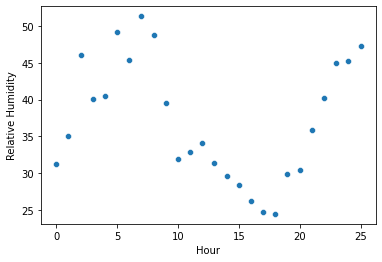

In [78]:
sns.scatterplot(data = date_of_interest1, x = 'Hour', y = 'Relative Humidity')

<AxesSubplot:xlabel='date', ylabel='Relative Humidity'>

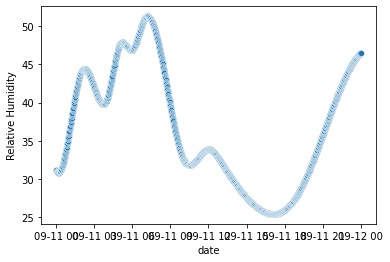

In [79]:
sns.scatterplot(data = temp_df1, x = 'date', y = 'Relative Humidity')